<a href="https://colab.research.google.com/github/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Oxford_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `scikit-learn` Tutorial
* This notebook covers different code implements from the scikit learn library, including:
  * Rescaling and Standardizing Data 
  * Model Evaluation and Metrics 
  * Classification and regression machine learning algorithms 
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We will use classification and regression datasets from `scikit-learn`, and will take code from the Hands-On Machine Learning with Scikit-Learn and TensorFlow* coursebook, as well as the [Machine Learning with Python Cookbook](https://www.amazon.co.uk/Machine-Learning-Python-Cookbook-Chris/dp/1491989386/ref=pd_sim_14_5?_encoding=UTF8&pd_rd_i=1491989386&pd_rd_r=e03d308c-dd3d-11e8-9244-bbcc5e42676d&pd_rd_w=lQiym&pd_rd_wg=lVZwd&pf_rd_i=desktop-dp-sims&pf_rd_m=A3P5ROKL5A1OLE&pf_rd_p=1e3b4162-429b-4ea8-80b8-75d978d3d89e&pf_rd_r=KBZG3157A75PS5MPGY8K&pf_rd_s=desktop-dp-sims&pf_rd_t=40701&psc=1&refRID=KBZG3157A75PS5MPGY8K).





### Approach and Exercises
* Note that this notebook is not focussed on how to structure an end to end machine learning problem, but is about extending the code implementations you will see in the end-to-end tutorials to further your knowledge.
* This notebook is a progression from the previous notebooks, meaning that the exercises will generally be more involved. We will provide code implementations for one of the datasets and leave space for you to code implementations on a different dataset. Support is available via Teams. 
* Each section will have an exercise to help reinforce your learning. We suggest you:
   * Write out each line of code by hand (rather than copy and paste it from the relevant example) - this will improve your understanding of code syntax
   * Write out, above each line of code, an explanation as to what the code, using a comment `#` - this will improve your understanding of how the code works


## 1. Tutorial set up 
* Import statements
* Loading the datasets
* Reviewing the ML problem

In [1]:
# import statements 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
 
import pandas as pd
import numpy as np
 
# Hide all warning messages
import warnings
warnings.filterwarnings('ignore')
 
# we will generally import scikit learn libraries when they are required, so you understand which specifc libraries are required

In [2]:
# load the classification dataset
class_data = load_breast_cancer()
class_X = pd.DataFrame(class_data.data, columns = class_data.feature_names)
class_y = class_data.target
 
# check the data has loaded successfully 
print(class_X.shape)
print(class_y.shape)

(569, 30)
(569,)


In [3]:
# load the regression dataset
boston = load_boston()
boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_y = boston.target
 
# check the data has loaded successfully 
print(boston_X.shape)
print(boston_y.shape)

(506, 13)
(506,)


## 2. Rescaling and Standardizing Data 
* Machine Learning algorithms can receive performance benefits from data that has been rescaled and standardized, either in terms of speed or accuracy, or both.
* There are a number of different ways of doing this, and implementations may vary because of algorithm requirements or personal preference.
* We cover two common implementations below, and an additional one in the exercise. We'd encourage further research to understand the maths in more detail.

In [4]:
## rescaling using MinMaxScaler, which converts data to a specified range, usually (0,1) or (-1,1)
# many machine learning algorithms assume data is on the same scale  
 
# here we import the necessary library 
from sklearn.preprocessing import MinMaxScaler
 
# Create feature - we will use one feature but you may just pass all the features to rescaler 
feature = class_X['texture error']
 
# print feature prior to rescaling
print("Features prior to rescaling:\n")
print(feature[0:10])
 
# we will print the shape out as well 
print("\nFeature shape prior to reshaping:")
print(feature.shape)

Features prior to rescaling:

0    0.9053
1    0.7339
2    0.7869
3    1.1560
4    0.7813
5    0.8902
6    0.7732
7    1.3770
8    1.0020
9    1.5990
Name: texture error, dtype: float64

Feature shape prior to reshaping:
(569,)


In [5]:
## because we have used a pandas column, our data has the wrong shape for the function
# we need a 2D tuple
 
# this will reshape the data 
feature = feature.values.reshape(-1,1)
 
# notice we now have a (samples,feature) tuple not just a (samples,) tuple
print("\nFeature shape after reshaping:")
feature.shape


Feature shape after reshaping:


(569, 1)

In [6]:
# we need to instantiate the scaler and pass in the range we want our values to be scaled within 
minmax_scale = MinMaxScaler(feature_range=(0, 1))
 
# Scale the feature - note the fit_transform function, in the next example we will separate these steps
scaled_feature = minmax_scale.fit_transform(feature)
 
# lets look at the features now we have rescaled
print("Features after rescaling:\n")
scaled_feature[0:10]

Features after rescaling:



array([[0.12046941],
       [0.08258929],
       [0.09430251],
       [0.17587518],
       [0.09306489],
       [0.11713225],
       [0.09127475],
       [0.22471711],
       [0.14184052],
       [0.27378006]])

In [7]:
## standardizing rescales features so that they are normally distributed, with a mean of 0 and a std deviation of 1
 
# import the appropriate library
from sklearn.preprocessing import StandardScaler
 
# we will transform all the features in the dataset, so let's look at it  prior to transformation
mean_std = pd.DataFrame(data={'mean':class_X.mean(), 'std':class_X.std()})
 
# call the dataframe
mean_std[0:10]

,mean,std
mean radius,14.127292,3.524049
mean texture,19.289649,4.301036
mean perimeter,91.969033,24.298981
mean area,654.889104,351.914129
mean smoothness,0.096360,0.014064
mean compactness,0.104341,0.052813
mean concavity,0.088799,0.079720
mean concave points,0.048919,0.038803
mean symmetry,0.181162,0.027414
mean fractal dimension,0.062798,0.007060


In [8]:
# Create scaler
scaler = StandardScaler()
 
# fit the scaler - this calculates the minimum and maximum values of the data
scaler.fit(class_X)
 
# transform the data using the fitted scaler - this applies the transform using the fit
standardized = scaler.transform(class_X)
 
# this shows the features transformed - note that this returns an array not a dataframe
standardized[0:10]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [9]:
# lets have another look at our transformed data
mean_std_transformed = pd.DataFrame(data={'mean':standardized.mean(axis=0), 'std':standardized.std(axis=0)}, index=class_X.columns)
 
# call the dataframe
mean_std_transformed[0:10]

,mean,std
mean radius,-3.162867e-15,1.0
mean texture,-6.530609e-15,1.0
mean perimeter,-7.078891e-16,1.0
mean area,-8.799835e-16,1.0
mean smoothness,6.132177e-15,1.0
mean compactness,-1.120369e-15,1.0
mean concavity,-4.421380e-16,1.0
mean concave points,9.732500e-16,1.0
mean symmetry,-1.971670e-15,1.0
mean fractal dimension,-1.453631e-15,1.0


### EXERCISE SECTION 2: 
* Apply the `Rescaling` and `Standardization` functions to one or more features of the `Boston` dataset
* Research and implement a `Normalizer` function
* Have a think about what circumstances each of these functions might be most appropriate to apply to different data and why 
* We can discuss the implementations and benefits of each approach on Teams 

* Apply the `Rescaling` and `Standardization` functions to one or more features of the `Boston` dataset

In [10]:
## EXERCISE CODE GOES HERE 

# Rescaling
print("****Rescaling & Standardization of boston dataset****")
# we will rescale all the boston dataset features using MinMaxScaler between (0,1)
minmax_scale = MinMaxScaler(feature_range=(0, 1))
# print features prior to rescaling
print("Features Prior to Rescaling & Standardization:")
display(boston_X)
# Scale the features and converting it to a dataframe
mmscaled_boston_X = minmax_scale.fit_transform(boston_X)
mmscaled_boston_X_df = pd.DataFrame(data = mmscaled_boston_X,columns=boston_X.columns)
# lets look at the recaled features
print("Features after minmax rescaling:\n")
display(mmscaled_boston_X_df)
# lets verify the rescaled features
min_max_mmscaled_boston_X_df = pd.DataFrame(data={'min':mmscaled_boston_X_df.min(axis=0), 'max':mmscaled_boston_X_df.max(axis=0)}, index=boston_X.columns)
# display the dataframe
display(min_max_mmscaled_boston_X_df)

# Standardization
# we will rescale all the boston dataset features using StandardScaler
stdscaler = StandardScaler()
# Scale the features
stdscaled_boston_X = stdscaler.fit_transform(boston_X) 
# lets look at the features now we have rescaled
print("Features after Standardization:")
display(pd.DataFrame(data = stdscaled_boston_X,columns=boston_X.columns))
# lets verify the transformed data
mean_std_transformed = pd.DataFrame(data={'mean':stdscaled_boston_X.mean(axis=0), 'std':stdscaled_boston_X.std(axis=0)})
# display the dataframe
display(mean_std_transformed)

****Rescaling & Standardization of boston dataset****
Features Prior to Rescaling & Standardization:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Features after minmax rescaling:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


,min,max
CRIM,0.0,1.0
ZN,0.0,1.0
INDUS,0.0,1.0
CHAS,0.0,1.0
NOX,0.0,1.0
RM,0.0,1.0
AGE,0.0,1.0
DIS,0.0,1.0
RAD,0.0,1.0
TAX,0.0,1.0


Features after Standardization:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


,mean,std
0,-8.787437e-17,1.0
1,-6.343191e-16,1.0
2,-2.682911e-15,1.0
3,4.701992e-16,1.0
4,2.490322e-15,1.0
5,-1.145230e-14,1.0
6,-1.407855e-15,1.0
7,9.210902e-16,1.0
8,5.441409e-16,1.0
9,-8.868619e-16,1.0


* Research and implement a `Normalizer` function

In [11]:
# import the normalizer function
from sklearn.preprocessing import Normalizer
#normalize using the Normalizer function so that the l2 norm is 1
normalize_boston_X = Normalizer('l2').fit_transform(boston_X)
normalize_boston_X_df = pd.DataFrame(normalize_boston_X,columns=boston_X.columns)
display(normalize_boston_X_df)
# lets verify the normalized data whose l2 norm should be 1
verify_normalize_boston_X_df = pd.DataFrame(data = np.sqrt(np.square(normalize_boston_X_df).sum(axis=1)), columns=['l2 norm'])
# display the dataframe
display(verify_normalize_boston_X_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000130,0.000000,0.024679,0.0,0.001185,0.013638,0.142942,0.005127,0.002069,0.564735,0.043441,0.810881,0.020004
502,0.000093,0.000000,0.024421,0.0,0.001173,0.012528,0.157005,0.004683,0.002047,0.558831,0.042987,0.812455,0.018587
503,0.000124,0.000000,0.024301,0.0,0.001167,0.014210,0.185364,0.004415,0.002037,0.556091,0.042776,0.808470,0.011488
504,0.000225,0.000000,0.024455,0.0,0.001175,0.013927,0.183053,0.004897,0.002050,0.559613,0.043047,0.806519,0.013283


,l2 norm
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
501,1.0
502,1.0
503,1.0
504,1.0


#Have a think about what circumstances each of these functions might be most appropriate to apply to different data and why 
#We can discuss the implementations and benefits of each approach on Teams 

- Without scaling, some features with higher values will have more impact on the model performance than the features with smaller values. Its like comparing Apples with Oranges. By using scaling, we can make all the features are in the same dimensional space and avoiding uneven impact on model performance.
- Normalizer function will be helpful to know similarity among things( like documents, person etc) irrespective of their size. retrieving related documents during search etc.

## 3. Model Evaluation and Metrics 
* We need to understand how we are going to assess our model's performance. This involves:
  * Splitting our Training and Testing data appropriately 
  * Choosing an Evaluation Metric
  * Developing a Baseline Model 


In [12]:
## testing and training splits 
 
# import statement 
from sklearn.model_selection import train_test_split
 
# this splits our data into a test and training set
# the function shuffles our data before splitting (so we will get both classes in both sets)
# setting a random_state means that this shuffling will be consistent for each run 
# setting stratify=class_y tells the function to have an even number of class labels in each set
X_train, X_test, y_train, y_test = train_test_split(class_X, class_y, test_size=0.3, random_state=1, stratify = class_y)

In [13]:
# we can verify the stratifications using np.bincount
print('Labels counts in y:', np.bincount(class_y))
print('Percentage of class zeroes in class_y',np.round(np.bincount(class_y)[0]/len(class_y)*100))
 
print("\n")
print('Labels counts in y_train:', np.bincount(y_train))
print('Percentage of class zeroes in y_train',np.round(np.bincount(y_train)[0]/len(y_train)*100))
 
print("\n")
print('Labels counts in y_test:', np.bincount(y_test))
print('Percentage of class zeroes in y_test',np.round(np.bincount(y_test)[0]/len(y_test)*100))

Labels counts in y: [212 357]
Percentage of class zeroes in class_y 37.0


Labels counts in y_train: [148 250]
Percentage of class zeroes in y_train 37.0


Labels counts in y_test: [ 64 107]
Percentage of class zeroes in y_test 37.0


* Note that there are additional ways to divide our data into test and training sets, and we cover `K-fold cross validation` in the **Pipeline** section below.

In [14]:
## we can create a baseline model to benchmark our other estimators against
## this can be a simple estimator or we can use a dummy estimator to make predictions in a random manner 
 
# this is the required import statement 
from sklearn.dummy import DummyClassifier
 
# this creates our dummy classifier, and the value we pass in to the strategy parameter determines how the 
# classifier will make the predictions
dummy = DummyClassifier(strategy='uniform', random_state=1)
 
# "Train" model
dummy.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [15]:
## evaluating the model metrics
 
# Here we get an accuracy score
dummy.score(X_test, y_test)

0.47953216374269003

* There are a number of different ways in `scikit-learn` to get an estimator score and it can get confusing first.
* Remember that to get a score, we need to instantiate a model, fit it to the data, predict using unseen data, compare the predictions against actual data, and score the difference. This is true for classification and regression problems, and is true no matter the method used to get there.
  * So, in the end-to-end tutorials we split the training and test data,  fitted our data to an estimator, and called the `.predict` method on the estimator to get our predictions, and then passed this to a scoring function (four steps)
  * In using the `estimator.score()`method above, we are passing in our split data and the method is then making predictions and returning the score (three steps). 
  * And, in the `cross_val_score()` method used below we are effectively using one step as the method takes an estimator and our data and returns a score. You can find out more about this method [here](https://scikit-learn.org/stable/modules/cross_validation.html) 
  * Another function cross validation function `cross_validate()` is available
  and enables the user to specify multiple scoring metrics at once.

In [16]:
## here we fit a new estimator and use cross_val_score to get a score based on a defined metric 
 
# import statements
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
 
# instantiate logistic regression classifier
logistic = LogisticRegression(solver='liblinear')
 
# we pass our estimator and data to the method. we also specify the number of folds (default is 3)
# the default scring method is the one associated with the estimator we pass in
# we can use the scoring parameter to pass in different scoring methods. Here we use recall.  
cross_val_score(logistic, class_X, class_y, cv=5, scoring="recall")

array([0.98591549, 0.97183099, 0.98611111, 0.95833333, 0.95774648])

### EXERCISE SECTION 3:
* Part 1: Implement binary classification scoring functions 
  * Use `cross_val_score` to implement `f1`, and `precision` scores 
  * Understand what these scores, and the `accuracy` and `recall` scores implemented above, tell us
* Part 2: Another way of assessing our model's performance is with the `Receiving Operating Characteristic (ROC) Curve`. 
  * What does this show us? Can you implement it?
  * Like the other questions here, we can work through these via Teams.
* Part 3: What are the main ways of evaluating a mutliclass classification problem?
  * Research and make notes below
* Part 4: Apply the above approach to the Boston dataset. You should think about:
  * What sort of test and training split you want to implement 
    * Be careful to change the variable names for `X_train`, `y_train` etc. so that the new dataset doesn't overwrite those variables
    * Experiment with not using the `stratify =  ` variable
  * The evaluation metrics you wish to use and why (this is different than above as the Boston dataset is a regression problem)
    * Evaluation metrics are covered in *Python Machine Learning*, Chapter 6
  * Implementing a baseline model 
    * *Python Machine Learning*, Chapter 10 has linear regression implementations to draw from.
* Feel free to discuss your approach on Teams and ask for support 

In [17]:
## EXERCISE SECTION 3: PART 1
## use the cross_val_score function to pass in and return the scoring functions: precision, f1 
## note the scores and research what each score represents 

#Precision = TruePositives / (TruePositives + FalsePositives)
cross_val_score(logistic, class_X, class_y, cv=5, scoring="precision")

array([0.90909091, 0.93243243, 0.97260274, 0.95833333, 0.98550725])

comment: more than 90% of the cancer cases are predicted currently

In [18]:
# F1 Score = 2*((precision*recall)/(precision+recall)) #Recall = TruePositives / (TruePositives + FalseNegatives)
cross_val_score(logistic, class_X, class_y, cv=5, scoring="f1")

array([0.94594595, 0.95172414, 0.97931034, 0.95833333, 0.97142857])

comment: more than 90% of the predictions are correct.

0.9422459112149533


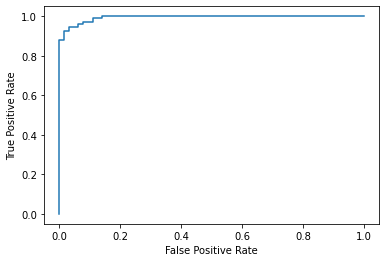

In [19]:
## EXERCISE SECTION 3: PART 2
## look up and implement the ROC metric 
# import the roc library
from sklearn.metrics import roc_auc_score
# fit the model with training data
logistic = logistic.fit(X_train,y_train)
#get the roc score by predicting for the test data
print(roc_auc_score(y_test, logistic.predict(X_test)))

# import libraries for plotting the roc curve
from sklearn import metrics
import matplotlib.pyplot as plt
#get the metrics
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

comment: the area under the curve is 94%

**EXERCISE SECTION 3: PART 3** 
* What are the evaluation metrics that can be used for mutliclass regression problems?


---

**Answer**
* Precision, Recall, F1 Score, TPR(True Positive Rate), FPR(False Positive Rate), ROC/AUC Curve


In [20]:
## EXERCISE SECTION 3: PART 4 
## Implement a baseline model and evaluation metric for the Boston dataset (regression)

# Lets create 10 bins for stratification.
min = np.amin(boston_y)
print('min:',min)
max = np.amax(boston_y)
print('max:',max)
bins     = np.linspace(start=min, stop=max, num=10)
Boston_y_binned = np.digitize(boston_y, bins, right=True)
#split the data
Boston_X_train, Boston_X_test, Boston_y_train, Boston_y_test = train_test_split(boston_X, boston_y, test_size=0.3, random_state=1, stratify = Boston_y_binned)
# we can verify the stratifications using np.bincount
print('Labels counts in y:', np.bincount(Boston_y_binned))
print('Labels counts in train y:', np.bincount(np.digitize(Boston_y_train, bins, right=True)))
print('Labels counts in test y:', np.bincount(np.digitize(Boston_y_test, bins, right=True)))
print('Percentage of bin 1 in boston_y',np.bincount(Boston_y_binned)[1]/sum(np.bincount(Boston_y_binned))*100.0)
print('Percentage of bin 1 in y_train',np.bincount(np.digitize(Boston_y_train, bins, right=True))[1]/sum(np.bincount(np.digitize(Boston_y_train, bins, right=True)))*100.0)
print('Percentage of bin 1 in y_test',np.bincount(np.digitize(Boston_y_test, bins, right=True))[1]/sum(np.bincount(np.digitize(Boston_y_test, bins, right=True)))*100.0)

min: 5.0
max: 50.0
Labels counts in y: [  2  22  73 118 167  40  36  17   9  22]
Labels counts in train y: [  2  15  51  83 117  28  25  12   6  15]
Labels counts in test y: [ 0  7 22 35 50 12 11  5  3  7]
Percentage of bin 1 in boston_y 4.3478260869565215
Percentage of bin 1 in y_train 4.23728813559322
Percentage of bin 1 in y_test 4.605263157894736


Comment: We can see the bin ratio is almost maintained in the train and test data. 

In [21]:
# import dummy regressor library 
from sklearn.dummy import DummyRegressor
# create dummyregressor model with strategy as mean where the predictions are averaged
dummy = DummyRegressor(strategy='mean')
 
# Now we will Train the regressor model
dummy.fit(X_train, y_train)

# Get the coefficient of determination (R^2) of the prediction. 
dummy.score(X_test, y_test)

-2.479463961435613e-05

Comment: the prediction is not good which i guess is worse than the straight line

## 4. Classification and regression machine learning algorithms 

### EXERCISE SECTION 4:
* You already have an idea about how to fit and instantiate machine learning models.
* There are a large number of machine learning approaches you can use, and this exercise is about understanding how a number of them perform on our datasets.
* Research and instantiate as many algorithms as you wish in the code cell marked below. 
  * There are a number of examples in *Python Machine Learning*, for example `SVM`, `Decision Trees` and `Logistic Regression` in Chapter 3.

In [22]:
## EXERCISE CODE HERE 
### Classification

In [23]:
#Instantiate Support Vector Classifier
from sklearn.svm import SVC
svclf = SVC(kernel='linear')
svclf = svclf.fit(X_train, y_train)
svclf.score(X_test,y_test)

0.9532163742690059

In [24]:
#Instantiate Decision Trees Classifier
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=21, criterion = 'entropy')
dtclf = dtclf.fit(X_train, y_train)
dtclf.score(X_test,y_test)

0.935672514619883

In [25]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logclf = LogisticRegression(random_state=0, solver = 'sag')
logclf = logclf.fit(X_train, y_train)
logclf.score(X_test,y_test)

0.9298245614035088

### Regression

In [26]:
#Instantiate SVM regressor
from sklearn.svm import SVR
svreg = SVR(C=1.0, degree=3)
svreg = svreg.fit(Boston_X_train, Boston_y_train)
svreg.score(Boston_X_test,Boston_y_test)

0.11569373089686708

In [27]:
#Instantiate Decision Trees regressor
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(min_samples_leaf = 4, random_state=0)
dtreg = dtreg.fit(Boston_X_train, Boston_y_train)
dtreg.score(Boston_X_test,Boston_y_test)

0.6586791264298695

In [28]:
#Instantiate K-nearest neighbor regressor
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=3)
knnreg = knnreg.fit(Boston_X_train, Boston_y_train)
knnreg.score(Boston_X_test,Boston_y_test)

0.4983009556683047

## 5. Regularization 
* When we train our models, we might need to prevent against **over-** or **underfitting**. Overfitting is when our model performs well on the training data but does not generalise to unseen data (such as our test set). The model might be too complex, with the parameter weights probably too large and aligned too closely to the patterns of the training data. The solution is to develop a means of reducing these weights during training, and this is done through a process called **regularization**.
* Underfitting is when our model is too simple to capture patterns in either the training or test sets. Chapters 3 and 10 of *Python Machine Learning* cover this topic in more detail.
* How we regularise the model depends on what estimator we are using. In most cases, we can penalise the increase in parameter weights as the model trains by inserting a regularization term to our model when we instantiate it. This is applicable to regression models, logistic regression and support vector classifiers (see below for implementations).  
* For these estimators, the regularization term is commonly either **L1 Regularization**, where the weights are reduced by a user defined parameter multiplied by the absolute value of the weights (or coefficients); or **L2 Regularization**, where the weights are reduced by a user defined parameter multiplied by the squared sum of the weights.
* For tree based models, such as Decision Trees and Random Forests, we can help prevent overfitting by adjusting parameters associated with the leaf and branch settings.
* Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales.
* We implement L1 and L2 Regularization for regression models in this section. In Section 6, we implement  `RandomSearchCV` (explained below) on a `Logistic Regression` estimator. The parameters that we change in that implementation are related to regularization ('`C`' and '`penalty`').

In [29]:
## For regularization in regression we instantiate new models
## Lasso regression is used for L1 Regularization 
# import statement 
from sklearn.linear_model import Lasso
# Create lasso regression with alpha value - this is our hyperparameter 
lassoreg = Lasso(alpha=0.5)
 
## Ridge regression is used for L2 Regularization
# import statement 
from sklearn.linear_model import Ridge
# Create ridge regression with an alpha value (our hyperparameter)
ridgereg = Ridge(alpha=0.5)


### EXERCISE FOR SECTION 5
* Part 1: Train both the models above and get a score. Compare the results and see if one type of regularization works better than another.
* Part 2: The `ElasticNet`estimator combines both L1 and L2 Regularization. Look up the estimator on the scikit-learn documentation and a) write out how it combines both regularization methods, and b) see if you can implement it.
* Part 3: We can use `RidgeCV` and `LassoCV` to explore the best regularization parameters for each estimator. Implement one or both of these estimators, defining the parameters you want to search over.
* Part 4: Look at the `DecisionTreeClassifier `documentation in `scikit-learn` and come to a view on which parameters can be set to help prevent overfitting (and therefore help regularization). 

In [30]:
## EXERCISE SECTION 5: PART 1 
# Part 1: Train both the models above and get a score. Compare the results and see if one type of regularization works better than another.

# Fit the lasso regression
lassoreg = lassoreg.fit(Boston_X_train, Boston_y_train)

# Fit the ridge regression
ridgereg = ridgereg.fit(Boston_X_train, Boston_y_train)

print('Lasso:',lassoreg.score(Boston_X_test, Boston_y_test))
print('Ridge:',ridgereg.score(Boston_X_test, Boston_y_test))


Lasso: 0.6162789382981506
Ridge: 0.6142851691424163


Comment: Score is almost same for Lasso and Ridge

In [31]:
## EXERCISE SECTION 5: PART 2 
# Part 2: The ElasticNetestimator combines both L1 and L2 Regularization. Look up the estimator on the scikit-learn documentation and 
#a) write out how it combines both regularization methods, and 
#b) see if you can implement it.

from sklearn.linear_model import ElasticNet
elasticregr = ElasticNet(l1_ratio = 0.9,random_state=0)
elasticregr.fit(Boston_X_train, Boston_y_train)
print('ElasticNetestimator:',elasticregr.score(Boston_X_test, Boston_y_test))

ElasticNetestimator: 0.6019291988239706


In [32]:
## EXERCISE SECTION 5: PART 3
# Part 3: We can use RidgeCV and LassoCV to explore the best regularization parameters for each estimator. 
# Implement one or both of these estimators, defining the parameters you want to search over.

from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.2,0.3,0.5,0.6,0.8,1], cv = 5).fit(Boston_X_train, Boston_y_train)
print('RidgeCV:',ridgecv.score(Boston_X_test, Boston_y_test))

from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas=[0.2,0.3,0.5,0.6,0.8, 1], cv = 5).fit(Boston_X_train, Boston_y_train)
print('LassoCV:',lassocv.score(Boston_X_test, Boston_y_test))



RidgeCV: 0.614515662943599
LassoCV: 0.6089710664062065


#### EXERCISE SECTION 5: PART 4
#### Part 4: Look at the DecisionTreeClassifier documentation in scikit-learn and come to a view on which parameters can be set to help prevent overfitting (and therefore help regularization).

Use the hyperparameters max_depth, min_samples_leaf, min_samples_split, ccp_alpha parameters to prevent the model from overfitting.


 ## 6. Optimizing parameters 
 * We applied `GridSearchCV` to identify the best hyperparameters for our models in the in-class regression tutorials.
 * There are other methods available to use that don't take the brute force approach of `GridSearchCV`.
 * We will cover an implementation of `RandomizedSearchCV` below, and use the exercise for you to implement it on the other datatset.
  * We use this method to search over defined hyperparameters, like `GridSearchCV`, however a fixed number of parameters are sampled, as defined by `n_iter` parameter.  
  

In [33]:
# import libraries - note we use scipy for generating a uniform distribution 
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
 
# Create logistic regression
logistic = LogisticRegression(solver='liblinear')
 
# we can create hyperparameters as a list, as in a type regularisation penalty 
penalty = ['l1', 'l2']
 
# or as a distribution of values to sample from -'C' is the hyperparameter controlling the size of the regularisation penalty 
C = uniform(loc=0, scale=4)
 
# we need to pass these parameters as a dictionary of {param_name: values}
hyperparameters = dict(C=C, penalty=penalty)
 
# we instantiate our model
randomizedsearch = RandomizedSearchCV(
    logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
    n_jobs=-1)
 
# and fit it to the data 
best_model = randomizedsearch.fit(class_X, class_y)

In [34]:
# and we can call this method to return the best parameters the search returned
best_model.best_estimator_

LogisticRegression(C=2.6866163896885373, solver='liblinear')

### EXERCISE FOR SECTION 6: 
* Part 1: Once we have fit the model to our data, we can call different methods on it, for example we can find out what the best parameters were, and we can predict using the best estimator returned by the search. Use the docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to call these methods on the `best_model` variable above. 
* Part 2: Implement `RandomSearchCV` on the Boston dataset
  * Think about which parameters you want to specify
  * You can pass these parameters to variables prior to creating the random search (as we do above)
  * Then call methods as we do for Part 1.

In [35]:
## EXERCISE SECTION 6: PART 1 
# print the best parameters
print(best_model.best_params_)
# predict using the best parameters
print(best_model.predict(X_test))

{'C': 2.6866163896885373, 'penalty': 'l2'}
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]


In [36]:
## EXERCISE SECTION 6: PART 2


# We will use Gradient Boosting regression
from sklearn.ensemble import GradientBoostingRegressor
gbmregr = GradientBoostingRegressor()

# create hyper parameters
loss = ['squared_error','absolute_error','huber','quantile']
max_features = ['auto','sqrt','log2']
criterion = ['friedman_mse','squared_error','mse','mae']
learning_rate=[0.5, 0.1,0.01]
# min_samples_split = [2,4,8,16,32]
# min_samples_leaf = [2,4,8,16,32]
# max_depth = [2,4,8,16,32]
hyperparameters = dict(loss=loss, learning_rate=learning_rate, max_features = max_features, criterion = criterion)#, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_depth = max_depth)
 
# we instantiate our model
randomizedsearch = RandomizedSearchCV(
    gbmregr, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
    n_jobs=-1)
 
# and fit it to the data 
best_model = randomizedsearch.fit(Boston_X_train, Boston_y_train)
# print the best parameters
print('Best Parameters:',best_model.best_params_)

# Get the score for train data using the best parameters
print('RSquared Train:',best_model.score(Boston_X_train, Boston_y_train))
# Get the score for test data using the best parameters
print('RSquared Test:',best_model.score(Boston_X_test,Boston_y_test))

Best Parameters: {'max_features': 'log2', 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'mse'}
RSquared Train: 0.9656200662680129
RSquared Test: 0.8450590234911086


## 7. Ensemble models 

* The goal of ensemble methods is to combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone. 
* There are several different approaches to achieve this, including **majority voting** ensemble methods, with which we select the class label that has been predicted by the majority of classifiers.
* The ensemble can be built from different classification algorithms, such as decision trees, support vector machines, logistic regression classifiers, and so on. Alternatively, we can also use the same base classification algorithm, fitting different subsets of the training set. 
* Indeed, majority voting will work best if the classifiers used are different from each other and/or trained on different datasets (or subsets of the same data) in order for their errors to be uncorrelated.  Chapter 7 of *Python Machine Learning* has a good discussion of the principles behind Ensemble models. 

In [37]:
# import our classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
 
# lets instantiate individual models 
log_clf = LogisticRegression(solver='liblinear')
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
 
# and an ensemble of them
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              # here we select hard voting, which returns the majority of the predictions, not an average of probabilities
                              voting='hard')

In [38]:
# here we can cycle through the individual estimators 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    # fit them to the training data 
    clf.fit(X_train, y_train)
    
    # get a prediction
    y_pred = clf.predict(X_test)
    
    # and print the prediction 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9473684210526315
RandomForestClassifier 0.9473684210526315
SVC 0.9239766081871345
VotingClassifier 0.9532163742690059


### EXERCISE FOR SECTION 7: 
* Part 1: Implement **soft voting**.
 * If all the classifiers used in the ensemble are able to estimate class probabilities (they have a `predict_proba()` method that can be called on the estimator), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. 
 *  Replace `voting="hard"` with `voting="soft"` and ensure that all your classifiers can estimate class probabilities. 
  * If you use the SVC estimator, you need to set `probability = True`, which will make the SVC class use cross-validation to estimate class probabilities and add a predict_proba() method. 

* Part 2: Implement Ensemble Learning on the Boston Dataset.


In [39]:
## EXERCISE SECTION 7: PART 1 

# lets instantiate individual models 
log_clf = LogisticRegression(solver='liblinear')
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)
 
# and an ensemble of them
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              # here we select soft voting, which returns the average of probabilities
                              voting='soft')

# here we can cycle through the individual estimators 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    # fit them to the training data 
    clf.fit(X_train, y_train)
    
    # get a prediction
    y_pred = clf.predict_proba(X_test)
    
    # and print the prediction 
    print(clf.__class__.__name__, cross_val_score(clf, class_X, class_y, cv=3, scoring="recall") )
    

LogisticRegression [0.97478992 0.99159664 0.93277311]
RandomForestClassifier [0.95798319 0.99159664 0.95798319]
SVC [0.97478992 0.99159664 0.97478992]
VotingClassifier [0.99159664 0.99159664 0.95798319]


In [40]:
## EXERCISE SECTION 7: PART 2 

# import the regressor libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

# lets instantiate individual models 
logreg = LinearRegression()
rndreg = RandomForestRegressor()
svmreg = SVR()
 
# and an ensemble of them
votingreg = VotingRegressor(estimators=[('lr', logreg), ('rf', rndreg), ('svr', svmreg)])

# here we can cycle through the individual estimators 
for reg in (logreg, rndreg, svmreg, votingreg):
    
    # fit them to the training data 
    reg.fit(Boston_X_train, Boston_y_train)
    
    # and print the prediction 
    print(reg.__class__.__name__, reg.score(Boston_X_test, Boston_y_test) )

LinearRegression 0.6144064431452883
RandomForestRegressor 0.8806418693338073
SVR 0.11569373089686708
VotingRegressor 0.6976143213929777


## 8. Building Pipelines
* We can build a pipeline so that many of the steps we have covered to now can be implemented in one step, and be applied to the training and testing set without repeating code.
* We will cover one implementation of a pipeline. The exercise below will link to further information for you to be able implement your own pipelines.

In [41]:
# import the libraries - these are dependent on what we wish to implement in our pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# this is the pipeline class required to implement all pipelines
from sklearn.pipeline import make_pipeline

In [42]:
# here we instantiate the pipeline with our methods
pipe_lr = make_pipeline(StandardScaler(),                    # takes an arbitary number of transfomers
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))  # but ends with an estimator

In [43]:
# here we fit our pipeline to the data, so that the steps above are executed on the training set
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [44]:
# here we call the predict method on our pipeline model against the test set 
y_pred = pipe_lr.predict(X_test)

In [45]:
# and print out the result
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.947


### EXERCISE FOR SECTION 8: 
* Implement a pipeline on the classification dataset (the one used in the example above). Specifically, implement `K-Fold Cross Validation` as set out in  *Python Machine Learning*, Chapter 6.
  Moreinformation on pipelines is available at this [link](https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html) blog series 
* Think about:
  * the code being implemented for `K-Fold Cross Validation` as part of the pipeline. Put comments above the code to explain what is happening. 
  * how you want to preprocess the data
  * whether you want to think about reducing the dimensions of the data with something like `Principal Component Analysis` and why
  * what algorithm you want to use 
  * make sure to predict the data

In [46]:
## EXERCISE CODE HERE

# here we instantiate the pipeline with our methods
pipe_lr = make_pipeline(StandardScaler(),   # we will use StandardScaler to normalize the data
                        PCA(n_components=5), # we will pca for dimensionality reduction keeping only  top 5 components that explain the maximum variance
                        LogisticRegression(random_state=1))  # but ends with an estimator
#Approach 1 using kfold function
#import the kfold library
from sklearn.model_selection import KFold
# instantiate the kfold function with 3 folds(each fold having 2 splits of train and 1split of test data) and shuffled before splitting the data
kfold = KFold(n_splits= 3, shuffle=True, random_state=1)
# loop through Each fold which is constituted by two arrays: the first one is related to the training set, and the second one to the validation set.
scores = []
for train, validate in kfold.split(X_train):
    #fit the pipeline with the train array
    pipe_lr.fit(X_train.iloc[train], y_train[train])    
    # here we call the predict method on our pipeline model against the validation data 
    y_validate_pred = pipe_lr.predict(X_train.iloc[validate])
    # and print out the validation prediction result
    scores.append( accuracy_score(y_train[validate], y_validate_pred) )
    print('Validation Accuracy: %.3f' % accuracy_score(y_train[validate], y_validate_pred))

print('Average CV Accuracy: %.3f' % np.mean(scores))
    

Validation Accuracy: 0.985
Validation Accuracy: 0.977
Validation Accuracy: 0.962
Average CV Accuracy: 0.975


In [47]:
#Approach 2 using cross_val_score function
# import the kfold cross validation score function library
from sklearn.model_selection import cross_val_score
#call the cross validation score function to evaluate the pipe_lr with 3 folds
print(cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=3))
print('Average CV Accuracy: %.3f' % np.mean(cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=3)))


[0.96992481 0.95488722 0.99242424]
Average CV Accuracy: 0.972


## 9. Review
* We have covered:
  * Scaling and Standardizing Data 
  * Model Evaluation and Metrics 
  * Classification and regression machine learning algorithms  
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We have of course not covered everything that it is possible to cover, and there is plenty more to research. Please ask questions on Teams or follow-up with your own research.